#Question 4
CLUSTERING

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
data_set=pd.read_csv("Wholesale customers data.csv")
df=pd.DataFrame(data_set)
import matplotlib.pyplot as plt
print(df)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
5          2       3   9413   8259     5126     666              1795   
6          2       3  12126   3199     6975     480              3140   
7          2       3   7579   4956     9426    1669              3321   
8          1       3   5963   3648     6192     425              1716   
9          2       3   6006  11093    18881    1159              7425   
10         2       3   3366   5403    12974    4400              5977   
11         2       3  13146   1124     4523    1420               549   
12         2       3  31714  12319    11757     287

In [9]:
print('A look at the data')
print(df.head(),'\n')

print ('Number of columns and rows of the data ')
print(df.shape,'\n')

print ('Description of the data')
print(df.describe(),'\n')

print ('Types of data values')
print(df.dtypes, '\n')

#identify nans
def num_missing(x):
    return sum(x.isnull())
#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0),'\n') 

A look at the data
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

Number of columns and rows of the data 
(440, 8) 

Description of the data
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   153

#Elbow method
1.Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 
clusters.
2.For each k, calculate the total within-cluster sum of square (wss).
3.Plot the curve of wss according to the number of clusters k.
4.The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

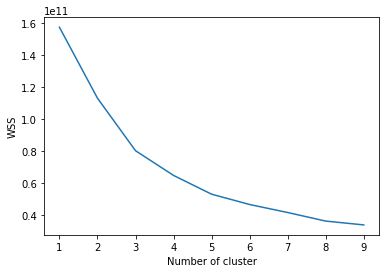

In [17]:
wss = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    wss[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()
    
#kmeans.labels_
#kmeans.predict()
#kmeans.cluster_centers_

Here the bend knee corresponds to k=5 0r 6(approximately)

In [23]:
km6=KMeans(n_clusters=6,init='k-means++', max_iter=1000, n_init=10, random_state=0)
y_means = km6.fit_predict(df)
print(y_means)    
km6.labels_

(440,)


array([0, 3, 3, 0, 0, 3, 0, 3, 3, 4, 4, 0, 5, 0, 5, 3, 4, 3, 0, 3, 0, 3,
       5, 4, 0, 0, 3, 0, 4, 5, 0, 3, 0, 5, 3, 3, 5, 4, 4, 1, 0, 0, 4, 4,
       3, 4, 4, 2, 0, 4, 3, 3, 5, 4, 5, 3, 4, 4, 0, 3, 3, 2, 3, 4, 3, 2,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 4, 0, 3, 3, 4, 4, 0, 0, 2, 2, 5,
       3, 5, 0, 0, 4, 0, 4, 3, 3, 3, 3, 3, 4, 4, 3, 1, 0, 0, 3, 4, 3, 4,
       0, 4, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 5, 1, 0, 0, 3, 5, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 0, 5, 5, 0, 0, 4, 3, 3, 3, 5, 0, 3, 0, 3,
       3, 4, 4, 0, 3, 4, 3, 0, 0, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4,
       5, 0, 0, 3, 0, 1, 4, 1, 3, 3, 3, 3, 4, 4, 0, 0, 3, 4, 3, 0, 5, 3,
       0, 3, 4, 4, 5, 3, 3, 4, 3, 3, 3, 4, 0, 2, 3, 3, 3, 4, 4, 0, 4, 3,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 5, 3, 0, 3, 3, 0, 3, 5, 0, 0,
       0, 0, 3, 4, 3, 0, 0, 3, 3, 4, 3, 5, 0, 5, 0, 3, 1, 5, 3, 3, 0, 3,
       4, 4, 4, 0, 4, 0, 3, 3, 3, 5, 3, 3, 5, 0, 0, 0, 3, 0, 5, 5, 1, 5,
       3, 0, 0, 5, 3, 3, 3, 4, 0, 3, 0, 3, 3, 3, 0,

In [20]:
km6.cluster_centers_

array([[1.13793103e+00, 2.58620690e+00, 3.61444828e+04, 5.47146552e+03,
        6.12879310e+03, 6.29865517e+03, 1.06400000e+03, 2.31672414e+03,
        2.81034483e+00],
       [1.86315789e+00, 2.53684211e+00, 4.80884211e+03, 1.05250105e+04,
        1.69097895e+04, 1.46258947e+03, 7.30240000e+03, 1.65088421e+03,
        2.41052632e+00],
       [1.90909091e+00, 2.54545455e+00, 1.98882727e+04, 3.61423636e+04,
        4.55174545e+04, 6.32890909e+03, 2.14170909e+04, 8.41400000e+03,
        2.81818182e+00],
       [1.15217391e+00, 2.53623188e+00, 9.08746377e+03, 3.02742754e+03,
        3.75351449e+03, 2.81798551e+03, 1.00300362e+03, 1.04052536e+03,
        5.82971014e+00]])